<a href="https://colab.research.google.com/github/vikasverma911/Xray_ML/blob/main/chest_Xrayipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
TRAIN_PATH = "drive/MyDrive/Dataset/Train"
VAL_PATH = "drive/MyDrive/Dataset/Test"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'drive/MyDrive/Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 312 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'drive/MyDrive/Dataset/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 80 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 281s 33s/step - loss: 1.7263 - accuracy: 0.4732 - val_loss: 0.6924 - val_accuracy: 0.4844
Epoch 2/10
8/8 [==============================] - 85s 10s/step - loss: 0.6472 - accuracy: 0.6354 - val_loss: 0.5669 - val_accuracy: 0.7812
Epoch 3/10
8/8 [==============================] - 83s 10s/step - loss: 0.4785 - accuracy: 0.7559 - val_loss: 0.4611 - val_accuracy: 0.7656
Epoch 4/10
8/8 [==============================] - 78s 10s/step - loss: 0.3302 - accuracy: 0.8910 - val_loss: 0.1588 - val_accuracy: 0.9688
Epoch 5/10
8/8 [==============================] - 77s 10s/step - loss: 0.1833 - accuracy: 0.9303 - val_loss: 0.0551 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 73s 9s/step - loss: 0.1810 - accuracy: 0.9445 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 73s 9s/step - loss: 0.1315 - accuracy: 0.9393 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 8/10
8/8 [============

In [ ]:
data = pd.DataFrame(model.history.history)

In [ ]:
data.head()

,loss,accuracy,val_loss,val_accuracy
0,1.349754,0.508065,0.692411,0.484375
1,0.616933,0.673387,0.566911,0.781250
2,0.460681,0.770161,0.461133,0.765625
3,0.310780,0.887097,0.158754,0.968750
4,0.195033,0.921875,0.055132,1.000000


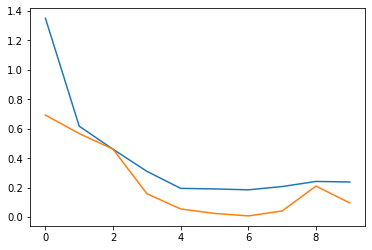

In [ ]:
plt.plot(data['loss'])
plt.plot(data['val_loss'])

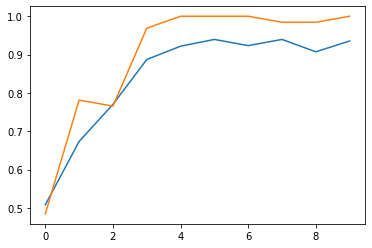

In [ ]:
plt.plot(data['accuracy'])
plt.plot(data['val_accuracy'])

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.10335128009319305, 0.987500011920929]

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
pred_probabilities = model.predict_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
pred_probabilities

array([[1.7006248e-02],
       [3.3412576e-02],
       [9.6372497e-01],
       [9.3056834e-01],
       [9.7176582e-01],
       [1.6784728e-02],
       [9.6077925e-01],
       [4.3931127e-02],
       [9.4825256e-01],
       [8.7981701e-01],
       [2.8598547e-02],
       [9.1786420e-01],
       [9.1338801e-01],
       [9.6921360e-01],
       [1.0366112e-02],
       [3.6769181e-02],
       [8.7055999e-01],
       [5.3958982e-02],
       [9.6954936e-01],
       [6.2899113e-02],
       [9.7848248e-01],
       [1.3709098e-02],
       [4.3566823e-02],
       [7.7009201e-04],
       [5.9941709e-03],
       [8.3158267e-01],
       [9.9444556e-01],
       [4.3784380e-03],
       [1.3094604e-02],
       [9.1050565e-03],
       [1.2173951e-03],
       [4.5969486e-03],
       [3.4928948e-02],
       [9.7630334e-01],
       [9.8978508e-01],
       [4.9105883e-03],
       [5.5001080e-02],
       [1.4905512e-02],
       [1.1022180e-02],
       [7.3186606e-02],
       [9.9439645e-01],
       [1.978747

In [ ]:
predictions = pred_probabilities > 0.75

In [ ]:
predictions

array([[False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(validation_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.59      0.60      0.59        40
           1       0.59      0.57      0.58        40

    accuracy                           0.59        80
   macro avg       0.59      0.59      0.59        80
weighted avg       0.59      0.59      0.59        80



In [ ]:
model.save('covid_detector_model.h5')